In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [8]:
water_gd = water.drop(columns=["ph","Trihalomethanes","Sulfate"])
# df.drop(columns=['points', 'rebounds', 'steals'], inplace=True)
water_gd

NameError: name 'water' is not defined

In [10]:
water=pd.read_csv('stark/data/water_potability.csv')
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [11]:
water.Potability.unique()


array([0, 1], dtype=int64)

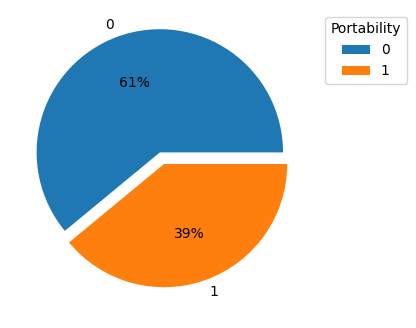

In [12]:
plt.figure(figsize=(4,4), dpi=100)
x = water.Potability.value_counts()
plt.pie(x, labels=x.index, autopct="%.0f%%",  explode=(0.1,0))
plt.legend(title="Portability", bbox_to_anchor=(1,1))

plt.savefig("Portability_Distribution.png")
plt.show()

In [13]:
y = water.isnull().sum()
exp = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
y

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

([<matplotlib.patches.Wedge at 0x2600e0922e0>,
 [Text(0.5701631246813923, 1.0558948864605564, 'ph'),
  Text(-0.6581900187559184, 1.0033872129990913, 'Hardness'),
  Text(-0.6581900187559184, 1.0033872129990913, 'Solids'),
  Text(-0.6581900187559184, 1.0033872129990913, 'Chloramines'),
  Text(-0.9015574469934698, -0.791955914032225, 'Sulfate'),
  Text(0.9101782357846312, -0.782032978271362, 'Conductivity'),
  Text(0.9101782357846312, -0.782032978271362, 'Organic_carbon'),
  Text(1.1252141758219982, -0.4170048663135977, 'Trihalomethanes'),
  Text(1.2000000000000002, -2.939152317953648e-16, 'Turbidity'),
  Text(1.2000000000000002, -2.939152317953648e-16, 'Potability')],
 [Text(0.3325951560641455, 0.6159386837686578, '34%'),
  Text(-0.383944177607619, 0.5853092075828032, '0%'),
  Text(-0.383944177607619, 0.5853092075828032, '0%'),
  Text(-0.383944177607619, 0.5853092075828032, '0%'),
  Text(-0.5259085107461907, -0.4619742831854646, '54%'),
  Text(0.5309373042077015, -0.4561859039916278, '0%

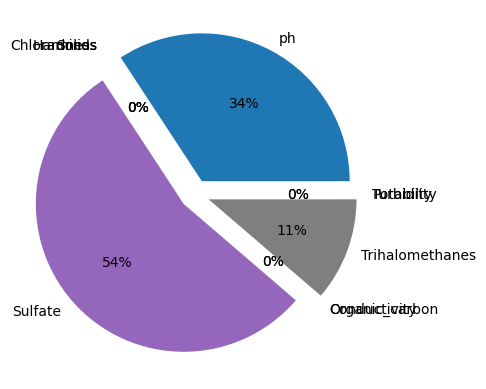

In [14]:
plt.pie(y, labels=y.index, autopct="%.0f%%", explode=exp)

NameError: name 'water_gd' is not defined

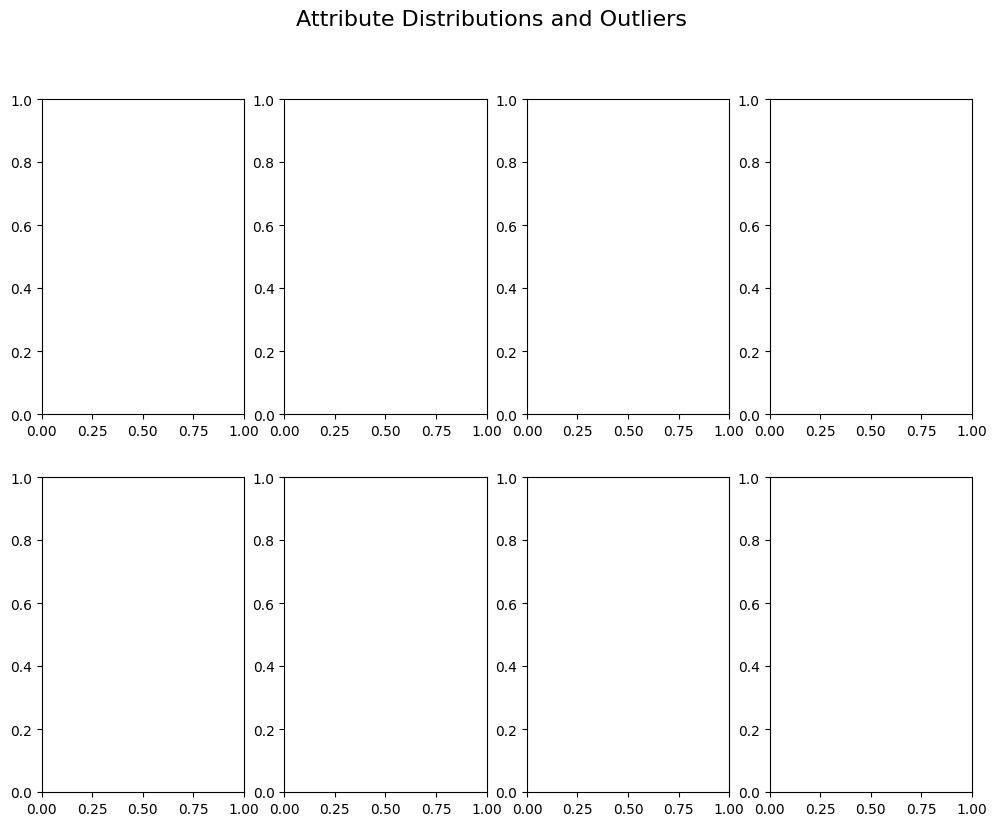

In [15]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 9))
fig.suptitle('Attribute Distributions and Outliers', fontsize=16)
# Iterate over the columns and create box plots
for i, column in enumerate(water_gd.columns):
    ax = axes[i // 4, i % 4]
    ax.boxplot(water_gd[column])
    ax.set_title(column)
    ax.set_ylabel('Value')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
water.describe()

NameError: name 'water_gd' is not defined

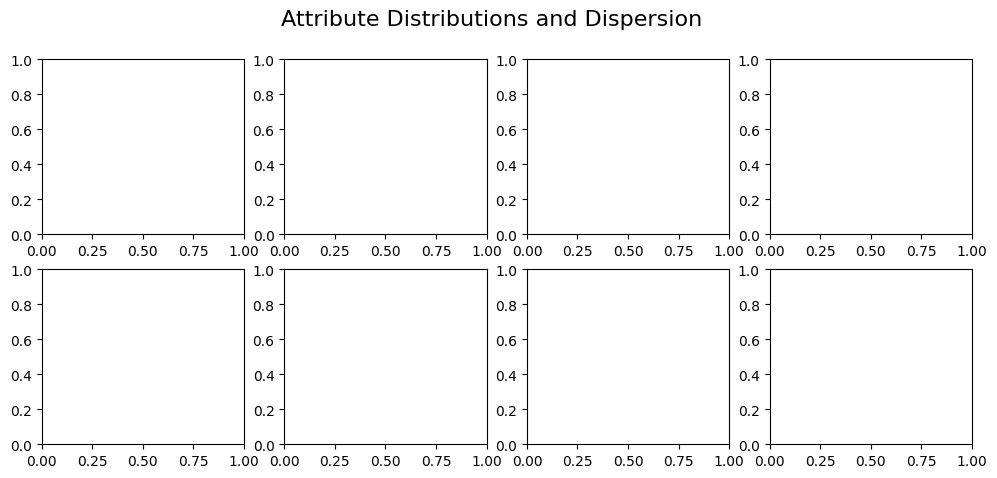

In [16]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))
fig.suptitle('Attribute Distributions and Dispersion', fontsize=16)

# Iterate over the columns and create distribution plots
for i, column in enumerate(water_gd.columns):
    ax = axes[i // 4, i % 4]
    sns.histplot(data=water_gd, x=column, kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
# checking null values
y

In [17]:
water.Sulfate= water.Sulfate.fillna(value=water.Sulfate.median())

In [18]:
water.ph = water.ph.fillna(value=water.ph.median())

In [19]:
water.Trihalomethanes = water.Trihalomethanes.fillna(value=water.Trihalomethanes.median())

In [20]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(df1.iloc[:,3:10])
df1.iloc[:,3:10] = imputer.transform(df1.iloc[:,3:10])
imputer = imputer.fit(df2.iloc[:,3:10])
df2.iloc[:,3:10] = imputer.transform(df2.iloc[:,3:10])

NameError: name 'SimpleImputer' is not defined

In [21]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [22]:
Y = water.iloc[:,9:]
X = water.iloc[:,0:9]

In [25]:
X.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
dtype: object

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [36]:
model = RandomForestClassifier(n_estimators=350, max_depth=40, max_features=8, criterion="gini", random_state=10)

In [37]:
model.fit(X_train, Y_train)

C:\Users\Kundan\AppData\Local\Temp\ipykernel_15416\4132381083.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


RandomForestClassifier(max_depth=40, max_features=8, n_estimators=350,
                       random_state=10)

In [38]:
pred = model.predict(X_test)

In [39]:
print(accuracy_score(Y_test, pred)*100)

69.96951219512195


In [40]:
print(f1_score(Y_test, pred))

0.506265664160401


In [41]:
print(confusion_matrix(Y_test, pred))

[[358  53]
 [144 101]]


<Axes: >

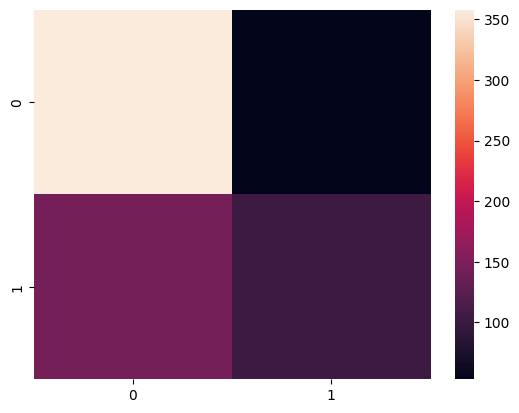

In [42]:
sns.heatmap(confusion_matrix(Y_test, pred))

In [43]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       411
           1       0.66      0.41      0.51       245

    accuracy                           0.70       656
   macro avg       0.68      0.64      0.65       656
weighted avg       0.69      0.70      0.68       656



In [44]:
import pickle
pickle.dump(model,open("Water_probabilty.sav","wb"))